# Linear Regression for News Group Classification
Hotvector Label 0 : [1,0,0,0] 1: [0,1,0,0], 2:[0,0,1,0] 3:[0,0,0,1]


In [1]:
# Train data load 
import pickle
import numpy as np
import math
train_data=pickle.load(open( "train_RBF.pkl", "rb" ))
# train_data=pickle.load(open( "train_PCA_sk.pkl", "rb" ))

In [2]:
#Encdoing Target Label into hotvector

import sklearn.preprocessing

label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(train_data['target'])+1))
target_vectorized = label_binarizer.transform(train_data['target'])


In [3]:
val_ratio  = 0.1 # for selection of lambda 
e=math.e
L = [e**-25, e**-20, e**-15, e**-10, e**-5,1,2,3, e**5, e**10] # range of lambda

In [4]:
#Split Train data into Train and Validation (Ratio Train : Val = 4:1)
train_num = int(train_data['data'].shape[0]*(1.0-val_ratio)) 
val_num = -1*int(train_data['data'].shape[0]*val_ratio)

In [5]:
#Train data and Train Target
#Validation data and Validation Target


train_feature = train_data['data'][:train_num]
train_target = train_data['target'][:train_num]
train_target_vec = target_vectorized[:train_num]

val_feature = train_data['data'][val_num:]
val_target = train_data['target'][val_num:]
val_target_vec = target_vectorized[val_num:]

In [6]:
#ADD BIAS 
train_bais=np.ones((train_num,1))
val_bais=np.ones((-1*val_num,1))
train_feature = np.append(train_feature,train_bais,axis = 1)
val_feature = np.append(val_feature,val_bais,axis = 1)

In [7]:
print(train_feature.shape)
print(val_feature.shape)

(915, 1001)
(101, 1001)


# Please implement train( ) and classifier_onehot( )

In [8]:
# Please implement Classifier in the file : Linear_Regression_Classifier.py
from cs536_2.models import Linear_Regression_Classifier

train_accuracy = list()
validation_accuracy = list()

LRC = Linear_Regression_Classifier(train_feature,train_target_vec)
for l in L: 
    LRC.train(l) #train with regularization parameter l
    train_pred = LRC.classifier_onehot(train_feature)
    val_pred = LRC.classifier_onehot(val_feature)
    train_acc = np.sum(train_pred ==train_target )/(1.0*train_num)
    val_acc = np.sum(val_pred==val_target)/(-1.0*val_num)
    train_accuracy.append(train_acc)
    validation_accuracy.append(val_acc)

In [9]:
# print(train_accuracy)
print(validation_accuracy)
print(train_accuracy)

[0.46534653465346537, 0.85148514851485146, 0.86138613861386137, 0.87128712871287128, 0.96039603960396036, 0.96039603960396036, 0.93069306930693074, 0.8910891089108911, 0.37623762376237624, 0.24752475247524752]
[0.25901639344262295, 0.99344262295081964, 0.99344262295081964, 0.99344262295081964, 0.98469945355191257, 0.95300546448087431, 0.92349726775956287, 0.90710382513661203, 0.41967213114754098, 0.29508196721311475]


# Please choose the approrpriate regularization parameter k and re-train the classifier 

In [21]:
k = L[4]#student answer
# k = 4
LRC.train(k) 

# TEST DATA set accuracy

In [22]:
# test data set loading
test_data=pickle.load(open( "test_RBF.pkl", "rb" ))
test_feature = test_data['data']
test_target = test_data['target']
test_num = test_data['data'].shape[0] 

test_bias = np.ones((test_num,1))
test_feature = np.append(test_feature,test_bias,axis = 1) # add bias

test_pred = LRC.classifier_onehot(test_feature)
test_acc = np.sum(test_pred ==test_target )/(1.0*test_num)

In [23]:
print("TEST Accuracy is".format(),test_acc)

TEST Accuracy is 0.923303834808


# ROC Curve : Please find the  y and 

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

fpr = dict()
tpr = dict()
roc_auc = dict()
test_vectorized = label_binarizer.transform(test_data['target']) # student code
y = label_binarizer.transform(test_pred) #student code
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(test_vectorized[:,i],y[:,i]) # i column
    roc_auc[i] = auc(fpr[i], tpr[i])



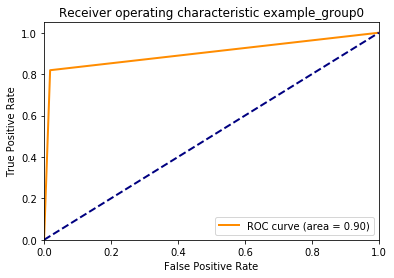

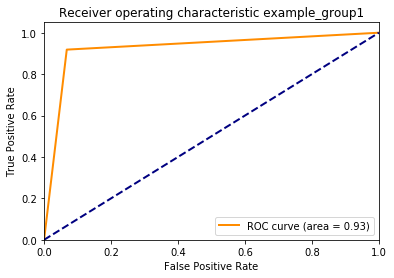

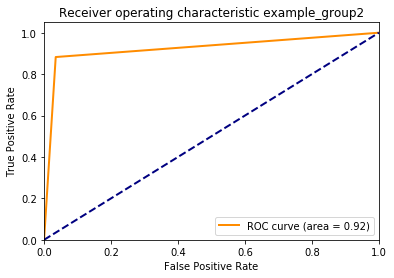

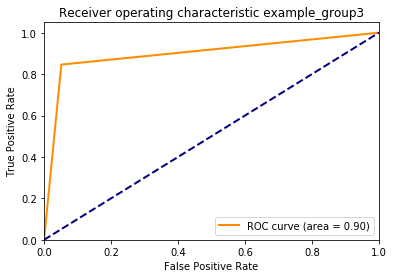

In [14]:
lw = 2
for i in range(4):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example_group'+str(i))
    plt.legend(loc="lower right")
    filename="ROC_RBF"+str(i)+".png"
#     plt.savefig(filename)
    plt.show()